# Carga de datos "HVAC"

In [1]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt

In [2]:
mainpath = "../Datasets/"
filename = "HVAC.xlsx"
fullpath = os.path.join(mainpath, filename)

In [3]:
data = pd.read_excel(fullpath, "HISTORICO_DATOS")
data

,Fecha- hora de lectura,POTENCIA TRAFO 2,POTENCIA TRAFO 3,POTENCIA TRAFO 4,POTENCIA TRAFO 5,POTENCIA MEDIA CONECTADA,PERIODO P6,CONTROL FRÍO,CONTROL CALOR,CAPACIDAD BOMBA CALOR FELIPE %,...,SECUNDARIO FRÍO 1,SECUNDARIO FRÍO 2,SECUNDARIO FRÍO 3,IMPULSIÓN SECUNDARIO CALOR,MODO INVIERNO BC1,MODO INVIERNO BC2,SECUNDARIO CALOR 1,SECUNDARIO CALOR 2,SECUNDARIO CALOR 3,ORDEN
0,2016-01-01 00:00:00,0.783603,38.338665,232.182602,235.755234,557.290039,0.000000,26.984179,34.337925,4.266667,...,0.0,0.0,7.954935,22.497906,0,0,100.0,100.0,100.000000,35433
1,2016-01-01 00:15:00,0.926969,38.338665,197.970230,113.384056,372.547760,0.866667,26.805664,34.337925,0.000000,...,0.0,0.0,0.588573,22.497906,0,0,-25.0,-25.0,-25.000000,35441
2,2016-01-01 00:30:00,0.793163,38.455196,211.676941,236.968918,469.299347,1.000000,26.055836,34.337925,0.000000,...,0.0,0.0,0.000000,22.288696,0,0,-25.0,-25.0,-25.000000,35442
3,2016-01-01 00:45:00,0.860073,38.688263,206.066818,298.481995,570.994995,1.000000,25.266325,34.337925,0.000000,...,0.0,0.0,0.000000,22.273752,0,0,-25.0,-25.0,-25.000000,35443
4,2016-01-01 01:00:00,0.812257,38.688263,193.984100,292.789215,563.804016,1.000000,25.605207,34.330490,0.000000,...,0.0,0.0,0.000000,22.408245,0,0,-25.0,-25.0,-25.000000,35444
5,2016-01-01 01:15:00,0.888717,38.688263,190.300995,279.843140,553.907654,1.000000,26.717415,34.330490,0.000000,...,0.0,0.0,0.000000,22.617455,0,0,-25.0,-25.0,-25.000000,35445
6,2016-01-01 01:30:00,0.802738,38.688263,176.961700,292.683258,533.081726,1.000000,28.336132,34.300755,0.000000,...,0.0,0.0,0.000000,22.766891,0,0,-25.0,-25.0,-25.000000,35446
7,2016-01-01 01:45:00,0.831385,38.688263,176.713120,269.536377,522.341614,1.000000,29.540056,34.256153,0.000000,...,0.0,0.0,0.000000,22.946217,0,0,-25.0,-25.0,-25.000000,35447
8,2016-01-01 02:00:00,0.802729,38.688263,176.003754,241.409500,512.430237,1.000000,30.624674,34.236099,0.000000,...,0.0,0.0,0.000000,22.946217,0,0,-25.0,-25.0,-25.000000,35448
9,2016-01-01 02:15:00,0.898297,38.688263,177.443466,202.532761,470.506317,1.000000,31.644857,34.207573,0.000000,...,0.0,0.0,0.000000,22.946217,0,0,-25.0,-25.0,-25.000000,35449


## Variables eliminadas por no ser necesarias

In [4]:
data2 = data
variables_a_eliminar = ["C_O_P_ BOMBA CALOR FELIPE", "C_O_P_ BOMBA CALOR CARLOS", "C_O_P_ INSTALACIÓN GRUPO FRÍO 1",
                       "C_O_P_ INSTALACÍON GRUPO FRÍO 2", "ORDEN", "VÁLVULA BY PASS SECUNDARIO FRÍO",
                       "TEMPERATURA CONTROL DE BY PASS SECUNDARIO", "SECUNDARIO FRÍO 1", "SECUNDARIO FRÍO 2", 
                        "SECUNDARIO FRÍO 3", "MODO INVIERNO BC1", "MODO INVIERNO BC2"]
lista_variables = data2.columns.values.tolist()
subLista = [x for x in lista_variables if x not in variables_a_eliminar]
data2 = data2[subLista]
data2.shape

(79285, 38)

### Cantidad de valores nulos por variable

In [5]:
data3 = data2[data2 != 0]
pd.isnull(data3).sum()

Fecha- hora de lectura                            0
POTENCIA TRAFO 2                                563
POTENCIA TRAFO 3                                493
POTENCIA TRAFO 4                               1042
POTENCIA TRAFO 5                                517
POTENCIA MEDIA CONECTADA                        182
PERIODO P6                                    49097
CONTROL FRÍO                                  30610
CONTROL CALOR                                 40110
CAPACIDAD BOMBA CALOR FELIPE %                47030
CAPACIDAD BOMBA CALOR CARLOS %                44653
POTENCIA BOMBA CALOR FELIPE                     855
POTENCIA BOMBA CALOR CARLOS                     855
TEMPERATURA AMBIENTE BOMBA CALOR CARLOS         855
TEMPERATURA AMBIENTE BOMBA CALOR FELIPE         855
TEMPERATURA EXTERIOR                          15362
CAPACIDAD GRUPO DE FRÍO 1                     45020
CAPACIDAD GRUPO DE FRÍO 2                     39079
POTENCIA GRUPO FRÍO 1                           995
POTENCIA GRU

## Resumen estadístico básico de las variables numéricas
- count: numero de elementos no nulos
- mean: promedio (suma de valores / numero de elementos)
- std: desviacion estandar (que tanto se separan los valores del promedio)
- min: valor minimo
- 25%: primer cuartil
- 50%: segundo cuartil
- 75%: tercer cuartil
- max: valor maximo

In [6]:
cuartiles = data3.describe()
cuartiles.to_excel("../Datasets/describeHVAC.xlsx")
cuartiles

,POTENCIA TRAFO 2,POTENCIA TRAFO 3,POTENCIA TRAFO 4,POTENCIA TRAFO 5,POTENCIA MEDIA CONECTADA,PERIODO P6,CONTROL FRÍO,CONTROL CALOR,CAPACIDAD BOMBA CALOR FELIPE %,CAPACIDAD BOMBA CALOR CARLOS %,...,TEMPERATURA SALIDA BOMBA CALOR CARLOS,TEMPERATURA SALIDA BOMBA CALOR FELIPE,KILO CALORÍAS GENERADAS BOMBA CALOR CARLOS,KILO CALORÍAS GENERADAS BOMBA CALOR FELIPE,KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 1,KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 2,IMPULSIÓN SECUNDARIO CALOR,SECUNDARIO CALOR 1,SECUNDARIO CALOR 2,SECUNDARIO CALOR 3
count,78722.000000,78792.000000,78243.000000,78768.000000,79103.000000,30188.000000,48675.000000,39175.000000,32255.000000,34632.000000,...,78430.000000,78430.000000,78175.000000,76756.000000,5.860300e+04,40770.000000,39173.000000,39175.000000,39170.000000,39173.000000
mean,21.415659,29.335971,322.380034,351.037831,768.994873,0.993748,14.568556,78.171784,56.635839,53.629318,...,29.768307,28.203867,115246.080922,102132.819638,1.110320e+05,163519.944304,34.084023,32.973802,20.293568,25.625551
std,29.274846,20.254332,104.167281,172.051692,306.371541,0.062733,3.555707,471.253156,29.002209,25.884188,...,13.399286,13.703611,129099.933267,126242.075402,1.034414e+05,83128.585141,7.676897,52.166392,55.941712,54.722419
min,0.140000,0.020000,1.417423,32.099998,7.882583,0.066667,2.754000,2.553333,1.066667,1.066667,...,0.420000,1.166667,216.663330,216.663330,3.999996e+02,449.996002,2.666667,-25.000000,-25.000000,-25.000000
25%,2.913333,20.700199,238.259995,166.501202,461.924469,1.000000,13.024667,38.299999,33.000000,33.000000,...,17.299999,15.100000,8970.000000,4290.000000,7.400007e+03,98450.015625,24.700001,-25.000000,-25.000000,-25.000000
50%,9.053698,26.100000,349.380280,405.859650,866.903198,1.000000,13.704000,38.299999,55.200001,50.000000,...,35.066666,29.260000,41643.273438,23009.972656,9.645000e+04,139600.000000,38.000000,20.006666,-25.000000,10.000000
75%,24.246666,34.646667,408.753723,476.139557,1016.493713,1.000000,15.231667,38.986668,83.000000,69.683331,...,42.466667,42.033333,222169.929688,203189.902344,1.878250e+05,237300.000000,40.200001,100.000000,100.000000,100.000000
max,227.385345,246.656601,565.151428,854.659973,1569.602173,1.000000,102.169998,8054.746582,100.000000,100.000000,...,47.889999,47.889999,509556.656250,509729.968750,2.040950e+06,354950.031250,57.500000,100.000000,100.000000,100.000000


# Transformación de variables

### Valores atipicos 

        IQR = Q3 - Q1
        q < Q1 - 1.5 * IQR
        q > Q3 + 1.5 * IQR

In [9]:
dataLimpioArr = data3.to_numpy()
cuartilesArr = cuartiles.to_numpy()
for i in range(37):
    for j in range(79285):
        q1 = cuartilesArr[4][i]
        q3 = cuartilesArr[6][i]
        iqr = q3 - q1
        extremoIzq = q1 - (1.5 * iqr)
        extremoDer = q3 + (1.5 * iqr)
        if (dataLimpioArr[j][i+1] < extremoIzq):
            dataLimpioArr[j][i+1] = cuartilesArr[1][i]
        if (dataLimpioArr[j][i+1] > extremoDer):
            dataLimpioArr[j][i+1] = cuartilesArr[1][i]
            
namesCol = data3.columns.values
dataSinAtipicos = pd.DataFrame.from_records(dataLimpioArr, columns = namesCol)
promedio = dataSinAtipicos.describe()
promedio

,POTENCIA TRAFO 2,POTENCIA TRAFO 3,POTENCIA TRAFO 4,POTENCIA TRAFO 5,POTENCIA MEDIA CONECTADA,PERIODO P6,CONTROL FRÍO,CONTROL CALOR,CAPACIDAD BOMBA CALOR FELIPE %,CAPACIDAD BOMBA CALOR CARLOS %,...,TEMPERATURA SALIDA BOMBA CALOR CARLOS,TEMPERATURA SALIDA BOMBA CALOR FELIPE,KILO CALORÍAS GENERADAS BOMBA CALOR CARLOS,KILO CALORÍAS GENERADAS BOMBA CALOR FELIPE,KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 1,KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 2,IMPULSIÓN SECUNDARIO CALOR,SECUNDARIO CALOR 1,SECUNDARIO CALOR 2,SECUNDARIO CALOR 3
count,78722.000000,78792.000000,78243.000000,78768.000000,79103.000000,30188.000000,48675.000000,39175.000000,32255.000000,34632.000000,...,78430.000000,78430.000000,78175.000000,76756.000000,58603.000000,40770.000000,39173.000000,39175.000000,39170.000000,39173.000000
mean,12.710581,25.437274,322.380034,351.037831,768.994873,0.999910,14.005693,48.911765,56.635839,53.629318,...,29.768307,28.203867,115246.080922,102127.509341,110978.489599,163519.944304,34.084023,32.973802,20.293568,25.625551
std,12.023414,11.741178,104.167281,172.051692,306.371541,0.000744,1.535162,17.512015,29.002209,25.884188,...,13.399286,13.703611,129099.933267,126233.502223,103013.833254,83128.585141,7.676897,52.166392,55.941712,54.722419
min,0.140000,0.020000,1.417423,32.099998,7.882583,0.993748,9.790667,37.271965,1.066667,1.066667,...,0.420000,1.166667,216.663330,216.663330,399.999603,449.996002,2.666667,-25.000000,-25.000000,-25.000000
25%,2.913333,20.700199,238.259995,166.501202,461.924469,1.000000,13.030000,38.299999,33.000000,33.000000,...,17.299999,15.100000,8970.000000,4290.000000,7400.007324,98450.015625,24.700001,-25.000000,-25.000000,-25.000000
50%,9.053698,26.100000,349.380280,405.859650,866.903198,1.000000,13.720000,38.299999,55.200001,50.000000,...,35.066666,29.260000,41643.273438,23009.972656,96450.000000,139600.000000,38.000000,20.006666,-25.000000,10.000000
75%,21.415659,30.917964,408.753723,476.139557,1016.493713,1.000000,14.682667,78.171784,83.000000,69.683331,...,42.466667,42.033333,222169.929688,203157.476562,187800.000000,237300.000000,40.200001,100.000000,100.000000,100.000000
max,56.243523,55.566319,565.151428,854.659973,1569.602173,1.000000,18.540001,78.171784,100.000000,100.000000,...,47.889999,47.889999,509556.656250,474023.312500,449950.000000,354950.031250,57.500000,100.000000,100.000000,100.000000


### Valores nulos

In [10]:
data4 = dataSinAtipicos
data4Arr = data4.to_numpy()
promedioArr = promedio.to_numpy()
for i in range(37):
    for j in range(79285):
        if ( math.isnan(data4Arr[j][i+1]) ):
            data4Arr[j][i+1] = promedioArr[1][i]
            
namesCol2 = dataSinAtipicos.columns.values
data5 = pd.DataFrame.from_records(data4Arr, columns = namesCol2)
data5

,Fecha- hora de lectura,POTENCIA TRAFO 2,POTENCIA TRAFO 3,POTENCIA TRAFO 4,POTENCIA TRAFO 5,POTENCIA MEDIA CONECTADA,PERIODO P6,CONTROL FRÍO,CONTROL CALOR,CAPACIDAD BOMBA CALOR FELIPE %,...,TEMPERATURA SALIDA BOMBA CALOR CARLOS,TEMPERATURA SALIDA BOMBA CALOR FELIPE,KILO CALORÍAS GENERADAS BOMBA CALOR CARLOS,KILO CALORÍAS GENERADAS BOMBA CALOR FELIPE,KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 1,KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 2,IMPULSIÓN SECUNDARIO CALOR,SECUNDARIO CALOR 1,SECUNDARIO CALOR 2,SECUNDARIO CALOR 3
0,2016-01-01 00:00:00,0.783603,38.338665,232.182602,235.755234,557.290039,0.999910,14.568556,78.171784,4.266667,...,36.190666,36.192665,28599.992188,26129.994141,4400.000488,29349.998047,22.497906,100.000000,100.000000,100.000000
1,2016-01-01 00:15:00,0.926969,38.338665,197.970230,113.384056,372.547760,0.993748,14.568556,78.171784,56.635839,...,33.625999,32.770664,163366.671875,193396.765625,18550.000000,163519.944304,22.497906,-25.000000,-25.000000,-25.000000
2,2016-01-01 00:30:00,0.793163,38.455196,211.676941,236.968918,469.299347,1.000000,14.568556,78.171784,56.635839,...,33.247997,32.559998,103306.765625,137973.359375,218650.000000,96750.000000,22.288696,-25.000000,-25.000000,-25.000000
3,2016-01-01 00:45:00,0.860073,38.688263,206.066818,298.481995,570.994995,1.000000,14.568556,78.171784,56.635839,...,32.989998,32.559998,73883.296875,102829.898438,247150.000000,214850.000000,22.273752,-25.000000,-25.000000,-25.000000
4,2016-01-01 01:00:00,0.812257,38.688263,193.984100,292.789215,563.804016,1.000000,14.568556,78.171784,56.635839,...,32.719997,32.242664,50396.769531,81683.398438,238550.000000,203300.000000,22.408245,-25.000000,-25.000000,-25.000000
5,2016-01-01 01:15:00,0.888717,38.688263,190.300995,279.843140,553.907654,1.000000,14.568556,78.171784,56.635839,...,32.517334,32.017334,34363.285156,62530.000000,230200.000000,198100.000000,22.617455,-25.000000,-25.000000,-25.000000
6,2016-01-01 01:30:00,0.802738,38.688263,176.961700,292.683258,533.081726,1.000000,14.568556,78.171784,56.635839,...,32.340000,31.788000,22836.750000,50093.312500,224350.000000,187800.000000,22.766891,-25.000000,-25.000000,-25.000000
7,2016-01-01 01:45:00,0.831385,38.688263,176.713120,269.536377,522.341614,1.000000,14.568556,78.171784,56.635839,...,32.054001,31.449999,11093.297852,42509.937500,206399.984375,182700.000000,22.946217,-25.000000,-25.000000,-25.000000
8,2016-01-01 02:00:00,0.802729,38.688263,176.003754,241.409500,512.430237,1.000000,14.568556,78.171784,56.635839,...,31.949999,31.449999,4896.663086,28469.990234,150799.984375,145049.984375,22.946217,-25.000000,-25.000000,-25.000000
9,2016-01-01 02:15:00,0.898297,38.688263,177.443466,202.532761,470.506317,1.000000,14.568556,78.171784,56.635839,...,31.612000,31.112000,953.330322,20713.361328,97400.000000,102950.000000,22.946217,-25.000000,-25.000000,-25.000000


## Analisis de correlacion

In [11]:
correlacion = data5.corr(method = "pearson")
correlacion.to_excel("../Datasets/corrHVAC.xlsx")
correlacion

,POTENCIA TRAFO 2,POTENCIA TRAFO 3,POTENCIA TRAFO 4,POTENCIA TRAFO 5,POTENCIA MEDIA CONECTADA,PERIODO P6,CONTROL FRÍO,CONTROL CALOR,CAPACIDAD BOMBA CALOR FELIPE %,CAPACIDAD BOMBA CALOR CARLOS %,...,TEMPERATURA SALIDA BOMBA CALOR CARLOS,TEMPERATURA SALIDA BOMBA CALOR FELIPE,KILO CALORÍAS GENERADAS BOMBA CALOR CARLOS,KILO CALORÍAS GENERADAS BOMBA CALOR FELIPE,KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 1,KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 2,IMPULSIÓN SECUNDARIO CALOR,SECUNDARIO CALOR 1,SECUNDARIO CALOR 2,SECUNDARIO CALOR 3
POTENCIA TRAFO 2,1.000000,0.159997,0.486024,0.476723,0.523121,0.034730,-0.079138,-0.042506,0.098227,0.092385,...,0.024178,0.005759,0.145264,0.170035,0.216635,0.157874,0.014694,0.071201,0.014870,0.040262
POTENCIA TRAFO 3,0.159997,1.000000,0.454359,0.377207,0.443471,-0.030064,-0.159514,0.149607,-0.004843,0.020411,...,0.208421,0.149664,0.188343,0.181076,0.015266,0.019323,0.206014,-0.070656,-0.111161,-0.091625
POTENCIA TRAFO 4,0.486024,0.454359,1.000000,0.798513,0.906083,-0.018504,-0.319419,0.091627,0.092134,0.083964,...,0.130623,0.069090,0.335967,0.337383,0.169626,0.167538,0.126462,0.108281,0.011588,0.050574
POTENCIA TRAFO 5,0.476723,0.377207,0.798513,1.000000,0.942364,0.020408,-0.293712,0.106077,0.278783,0.231394,...,0.042480,0.014984,0.445207,0.519621,0.280194,0.243800,0.037423,0.212897,0.113728,0.155059
POTENCIA MEDIA CONECTADA,0.523121,0.443471,0.906083,0.942364,1.000000,0.007445,-0.306782,0.103656,0.205573,0.177561,...,0.098148,0.060189,0.426573,0.465958,0.216082,0.186320,0.076470,0.176812,0.076970,0.117412
PERIODO P6,0.034730,-0.030064,-0.018504,0.020408,0.007445,1.000000,-0.001142,-0.012734,0.051442,0.042742,...,0.016987,0.015844,0.004875,0.011140,0.018283,0.055463,0.006986,-0.012878,-0.001243,-0.012148
CONTROL FRÍO,-0.079138,-0.159514,-0.319419,-0.293712,-0.306782,-0.001142,1.000000,-0.093038,-0.019429,-0.066610,...,-0.056667,-0.043632,-0.142980,-0.118619,0.095305,0.101722,-0.085263,0.009846,0.012732,0.021911
CONTROL CALOR,-0.042506,0.149607,0.091627,0.106077,0.103656,-0.012734,-0.093038,1.000000,0.079976,0.015062,...,0.289498,0.374295,0.078579,0.235572,-0.236185,-0.068455,0.404953,-0.131431,-0.247370,-0.158374
CAPACIDAD BOMBA CALOR FELIPE %,0.098227,-0.004843,0.092134,0.278783,0.205573,0.051442,-0.019429,0.079976,1.000000,0.276578,...,-0.091014,-0.104704,0.042759,0.516860,0.023499,0.013088,-0.053809,0.121632,0.043923,0.092205
CAPACIDAD BOMBA CALOR CARLOS %,0.092385,0.020411,0.083964,0.231394,0.177561,0.042742,-0.066610,0.015062,0.276578,1.000000,...,-0.072814,0.010445,0.497842,0.045526,-0.041868,-0.027160,-0.081089,0.121546,0.080426,0.107594


(array([2.2000e+01, 9.6100e+02, 5.8760e+03, 9.6640e+03, 4.4203e+04,
        8.1660e+03, 3.8440e+03, 3.4540e+03, 1.8270e+03, 1.2680e+03]),
 array([ 9.79066658, 10.66560001, 11.54053345, 12.41546688, 13.29040031,
        14.16533375, 15.04026718, 15.91520061, 16.79013405, 17.66506748,
        18.54000092]),
 <a list of 10 Patch objects>)

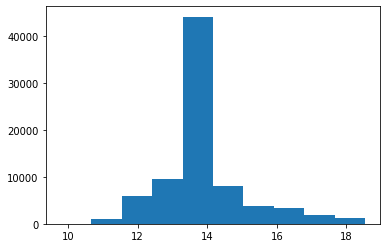

In [12]:
plt.hist(data5["CONTROL FRÍO"])

##### --------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
zscore = lambda x : (x - x.mean()) / x.std()
z_group = dataSinAtipicos["POTENCIA TRAFO 3"].transform(zscore)
z_group.describe()

In [ ]:
plt.hist(z_group)